In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [199]:
from ion_properties import ions,lead,calcium,xenon


Transverse cooling for all ions

In [200]:
# transverse_growth_rate_list=[]
# longitundinal_growth_rate=[]
# ion_names=[ion.name for ion in ions]
# ion_energy=[ion.hw0 for ion in ions]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion_loop in ions:
#     loaded_data = np.load(f'results/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']*1e3
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#      # Define the exponential function
#     def exponential_func(x, a, b):
#         return emittance_x[0] * np.exp(x * b)

#     # Fit the data to the exponential function
#     params_transverse, covariance = curve_fit(exponential_func, time, emittance_x)

#     # Extract the parameters
#     a, b = params_transverse

#     transverse_growth_rate_list.append(b)

#     plt.plot(time,emittance_x*1e6, label=f'{ion_loop.name}', linewidth=5.0)

#     plt.plot(time, exponential_func(time, *params_transverse) * 1e6, linestyle='--', label=f'{ion_loop.name} Fit')

    
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.show()

Also plot dp/p

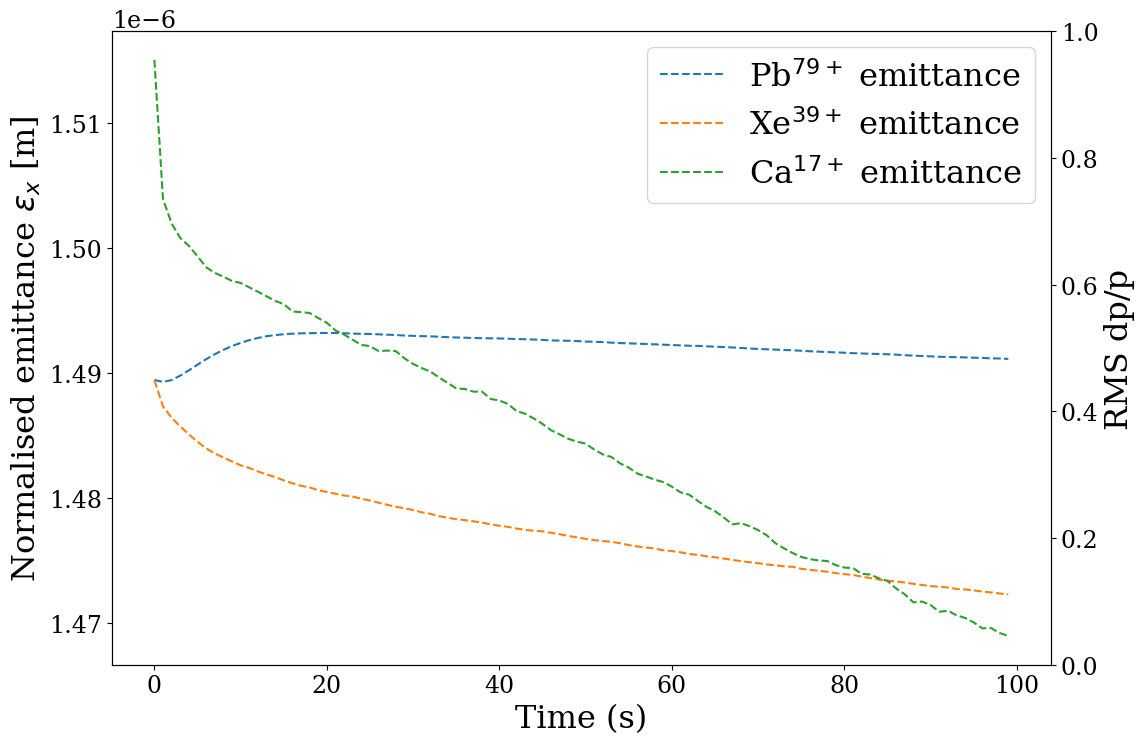

In [201]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Create a second y-axis
ax2 = ax1.twinx()

# Lists to store handles and labels
handles = []
labels = []

for ion_loop in ions:
    loaded_data = np.load(f'results/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot on ax1 and collect handles and labels
    line1, = ax1.plot(time, emittance_x, linestyle='--', label=f'{ion_loop.name} emittance')
    handles.append(line1)
    labels.append(f'{ion_loop.name} emittance')
    
    # # Plot on ax2 and collect handles and labels
    # line2, = ax2.plot(time, rms_dp_p, label=f'{ion_loop.name} dp/p')
    # handles.append(line2)
    # labels.append(f'{ion_loop.name} dp/p')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_x$ [m]')
ax2.set_ylabel('RMS dp/p')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Combine handles and labels from both axes into a single legend
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


fit all emittance with exponential decay

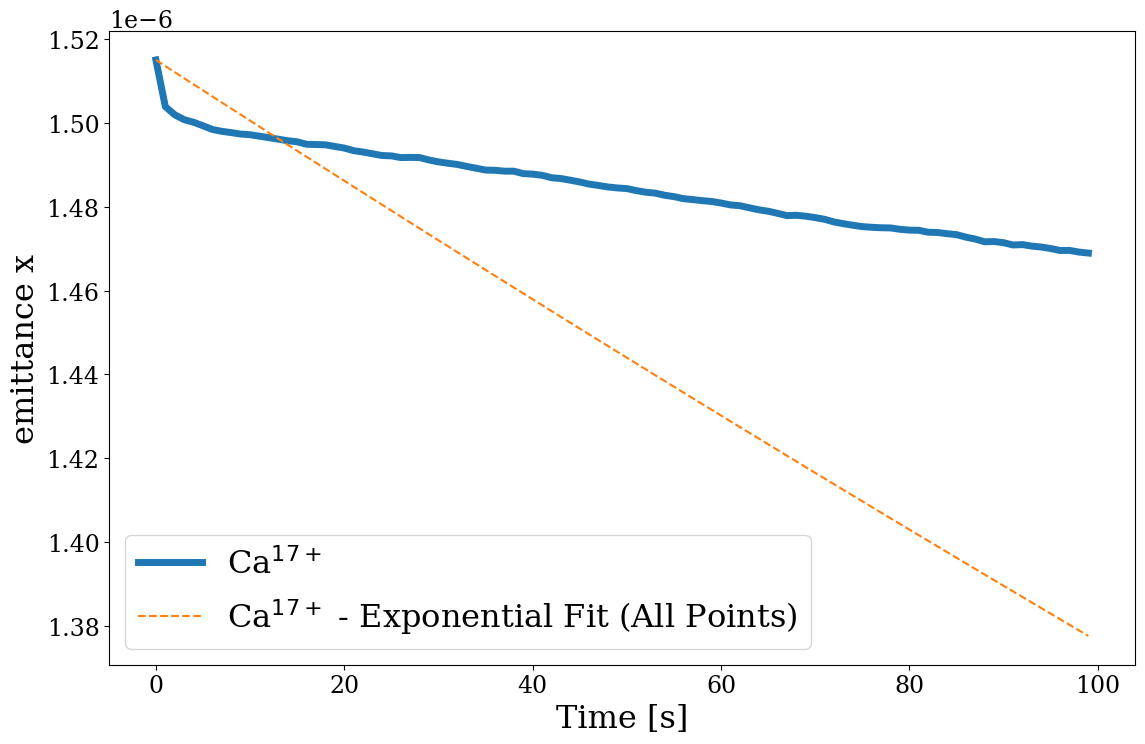

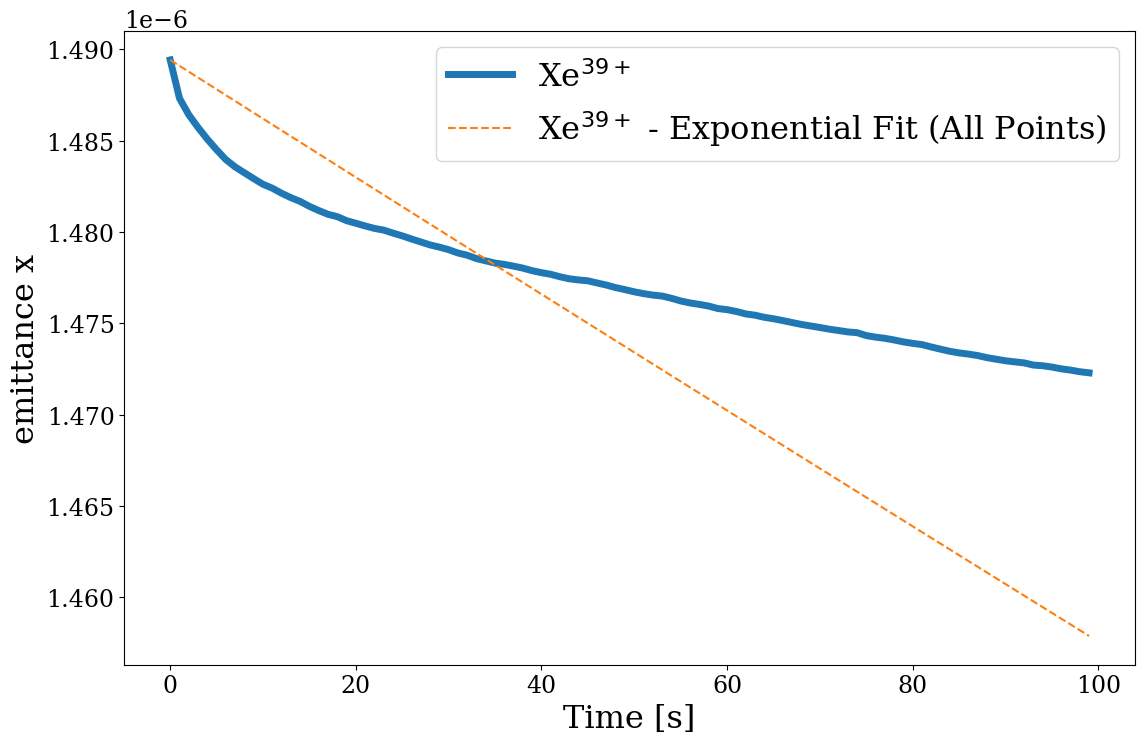

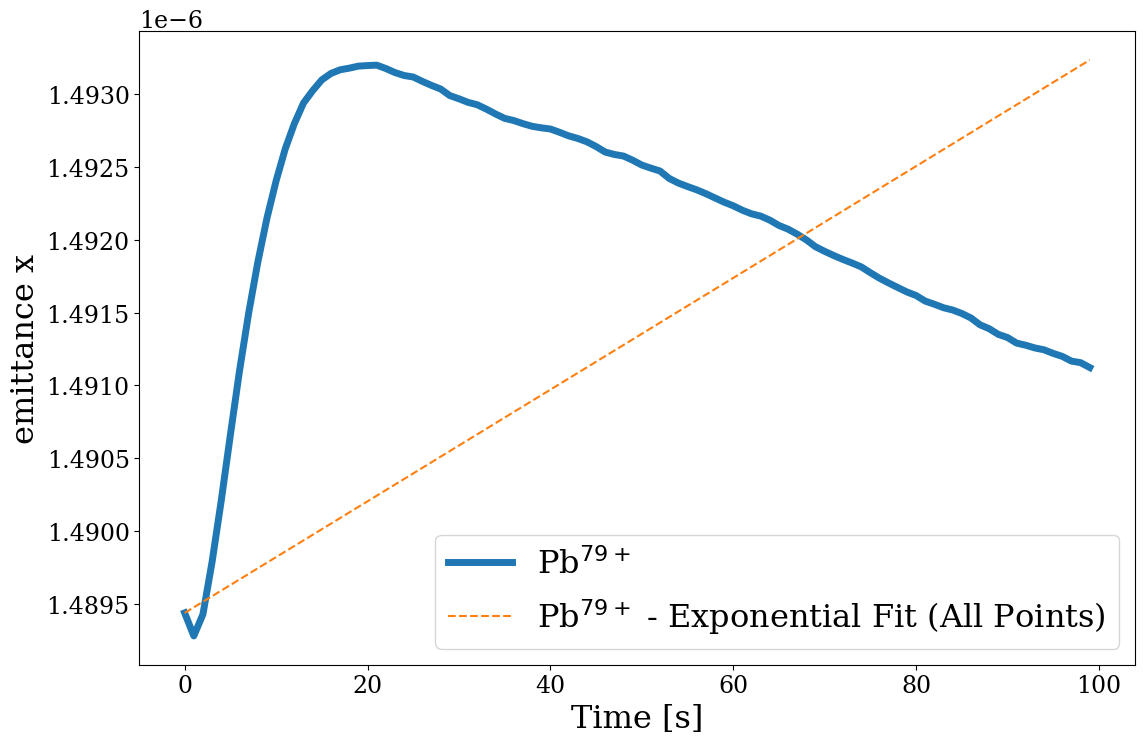

In [202]:
# Calcium
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [calcium]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return emittance_x[0] * np.exp(x * b)

    time_slice=20

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], emittance_x[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_emittance_calcium=b
    
    # Plot the original data
    plt.plot(time, emittance_x, label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'emittance x')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()
#########################################################################################################################
#Xenon
# Create a figure for longitudinal growth rate
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [xenon]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return emittance_x[0] * np.exp(x * b)

    time_slice=50

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], emittance_x[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_emittance_xenon=b

    # Plot the original data
    plt.plot(time, emittance_x, label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'emittance x')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()
#################################################################################################################################
#Lead
# Create a figure for longitudinal growth rate
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [lead]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return emittance_x[0] * np.exp(x * b)

    time_slice=100

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], emittance_x[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_emittance_lead=b

    # Plot the original data
    plt.plot(time, emittance_x, label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'emittance x')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()

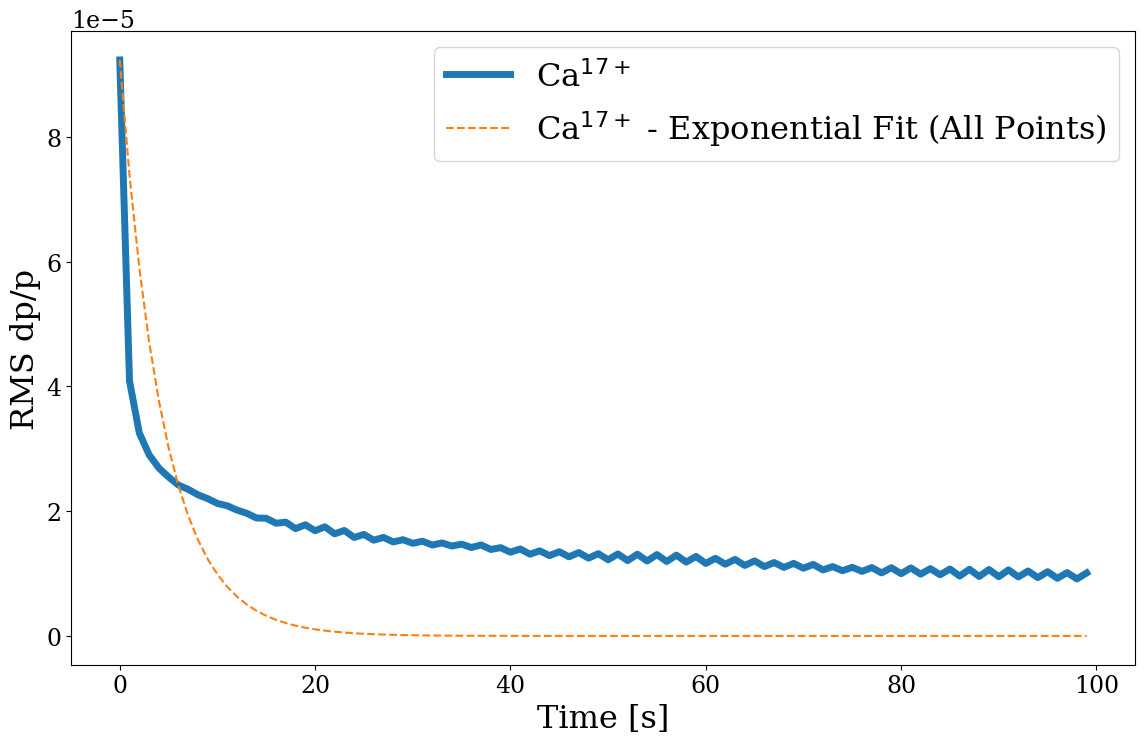

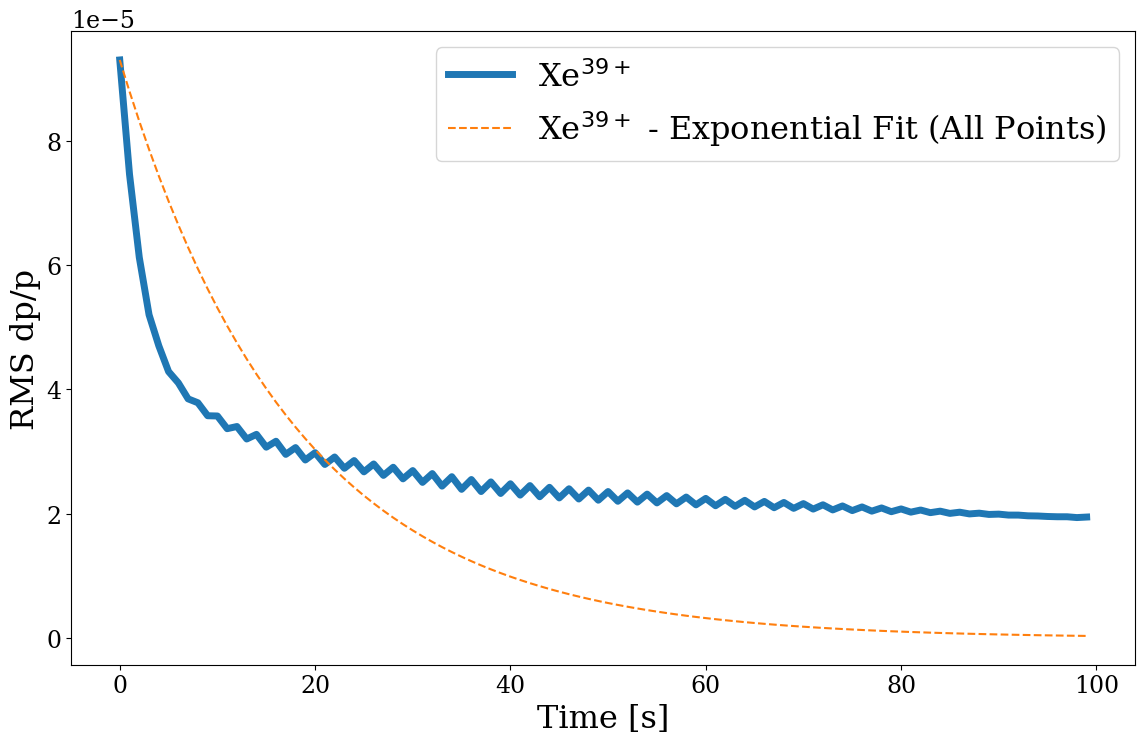

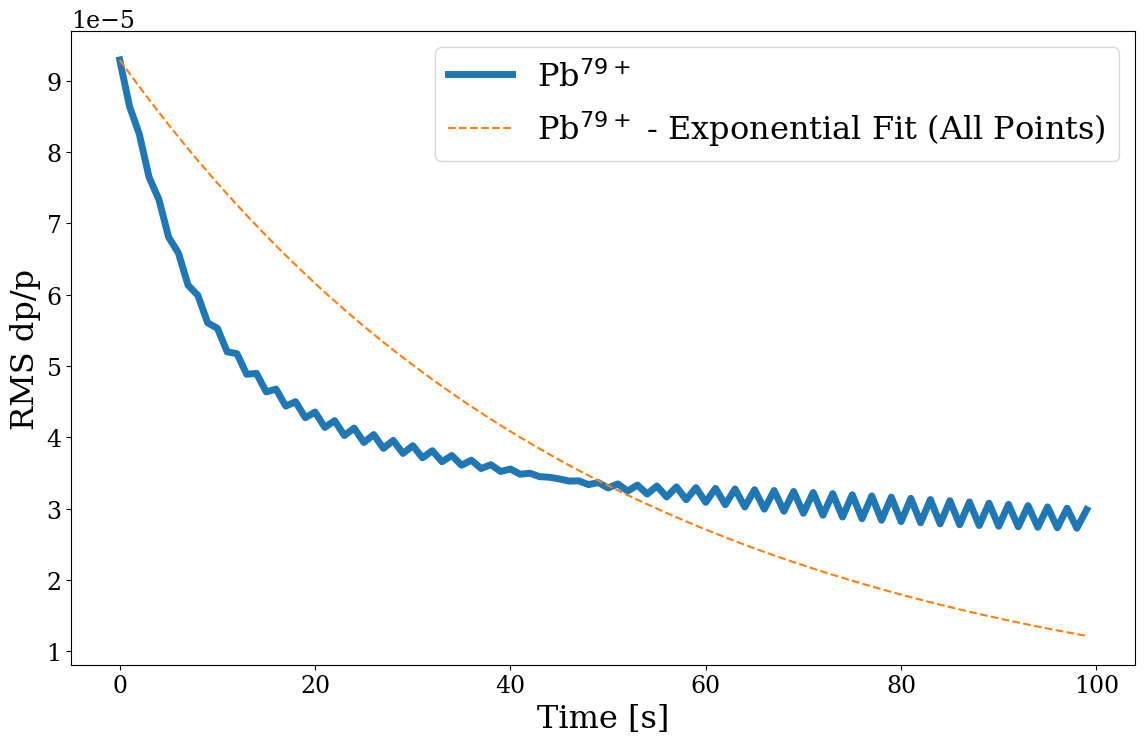

In [203]:
# Calcium
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [calcium]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return rms_dp_p[0] * np.exp(x * b)

    time_slice=20

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], rms_dp_p[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_longitudinal_calcium=b

    # Plot the original data
    plt.plot(time, np.std(delta, axis=1), label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'RMS dp/p')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()
#########################################################################################################################
#Xenon
# Create a figure for longitudinal growth rate
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [xenon]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return rms_dp_p[0] * np.exp(x * b)

    time_slice=50

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], rms_dp_p[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_longitudinal_xenon=b

    # Plot the original data
    plt.plot(time, np.std(delta, axis=1), label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'RMS dp/p')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()
#################################################################################################################################
#Lead
# Create a figure for longitudinal growth rate
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [lead]:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    time = loaded_data['time']
    rms_dp_p=np.std(delta,axis=1)
    

     # Define the exponential function
    def exponential_func(x, a, b):
        return rms_dp_p[0] * np.exp(x * b)

    time_slice=100

    # Fit the selected data to the exponential function
    params_longitudinal, covariance = curve_fit(exponential_func, time[:time_slice], rms_dp_p[:time_slice])

    # Extract the parameters
    a, b = params_longitudinal

    cooling_rate_longitudinal_lead=b

    # Plot the original data
    plt.plot(time, np.std(delta, axis=1), label=f'{ion.name}', linewidth=5.0)
    
    # Plot the exponential fit using all data points
    plt.plot(time, exponential_func(time, a, b), label=f'{ion.name} - Exponential Fit (All Points)', linestyle='--')

    
plt.xlabel(r'Time [s]')
plt.ylabel(r'RMS dp/p')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
#plt.savefig('Longitudinal_laser_cooling_rates.png', dpi=300)
plt.show()


Try fitting with damped oscilation

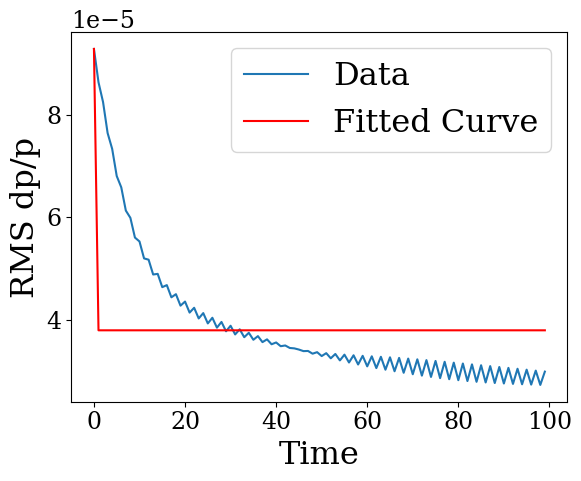

Decay Rate (gamma): 376.299723310702


In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming rms_dp_p and time are defined

# Define the damped oscillation function
def damped_oscillation(t, A, gamma, omega, phi, C):
    return rms_dp_p[0] * np.exp(-gamma * t) * np.cos(omega * t + phi) + C

# Initial guesses for the parameters (replace with reasonable estimates)
initial_guess = [1.0, 0.1, 2 * np.pi, 0, 0]

# Fit the data to the damped oscillation function
params, covariance = curve_fit(damped_oscillation, time, rms_dp_p, p0=initial_guess)

# Extract the decay rate
gamma_fit = params[1]

# Plot the original data and fitted curve
plt.plot(time, rms_dp_p, label='Data')
plt.plot(time, damped_oscillation(time, *params), 'r-', label='Fitted Curve')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time')
plt.ylabel(r'RMS dp/p')
plt.legend()
plt.show()

print("Decay Rate (gamma):", gamma_fit)



Double axis plot for emittance and rms_dp_p

In [205]:
# Assuming you have calculated these values
calcium_cooling_rate_emittance = cooling_rate_emittance_calcium
xenon_cooling_rate_emittance = cooling_rate_emittance_xenon
lead_cooling_rate_emittance = cooling_rate_emittance_lead

# Organize the cooling rates into a list
transverse_growth_rate_list = [calcium_cooling_rate_emittance, xenon_cooling_rate_emittance, lead_cooling_rate_emittance]

# Assuming you have calculated these values
calcium_cooling_rate_longitudinal = cooling_rate_longitudinal_calcium
xenon_cooling_rate_longitudinal = cooling_rate_longitudinal_xenon
lead_cooling_rate_longitudinal = cooling_rate_longitudinal_lead

# Organize the longitudinal cooling rates into a list
longitudinal_growth_rate = [calcium_cooling_rate_longitudinal, xenon_cooling_rate_longitudinal, lead_cooling_rate_longitudinal]


np.savez(f'results/cooling_rates.npz', transverse_growth_rate_list=transverse_growth_rate_list
                                     ,longitudinal_growth_rate=longitudinal_growth_rate)  

In [206]:
transverse_growth_rate_list

[-0.000961012083220643, -0.00021615805746958686, 2.572021743517269e-05]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


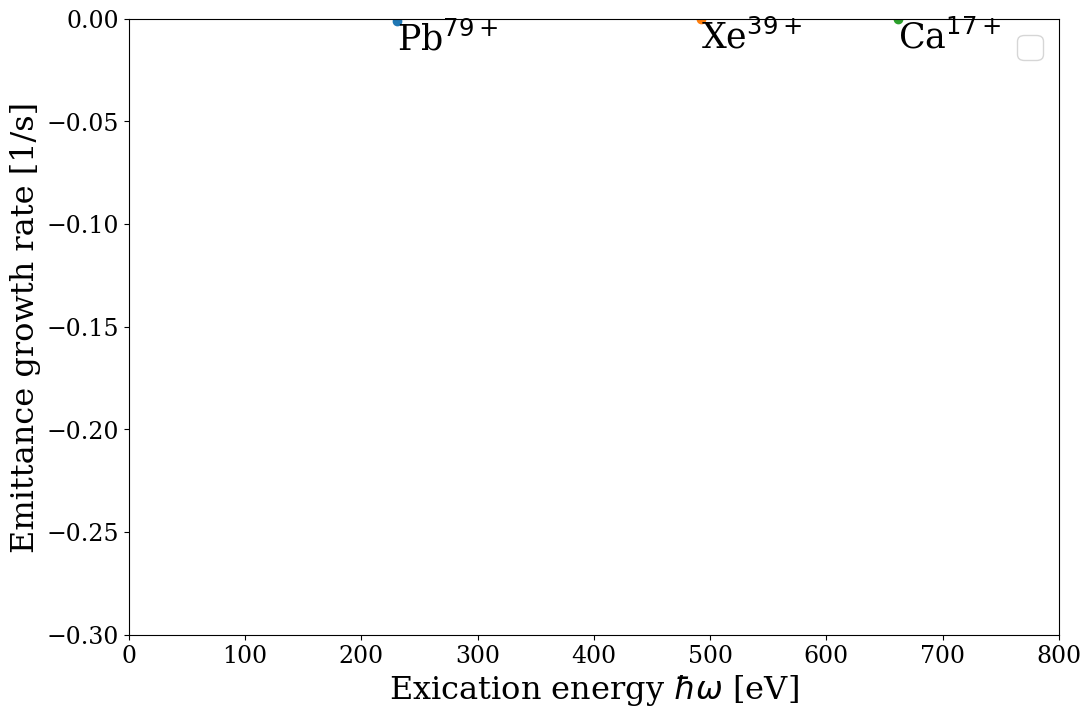

In [207]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
for i in range(len(ions)):
    plt.scatter(ion_energy[i],transverse_growth_rate_list[i])
    plt.text(ion_energy[i],transverse_growth_rate_list[i], f'{ion_names[i]}', fontsize=25, ha='left', va='top')
plt.ylim([-0.30,0]) 
plt.xlim([0,800])    
plt.xlabel(r'Exication energy $\hbar \omega$ [eV]')
plt.ylabel(r'Emittance growth rate [1/s]')
plt.legend()
plt.show()


In [208]:
lifetime_list = [-1 / growth_rate for growth_rate in transverse_growth_rate_list]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
for i in range(len(ions)):
    plt.scatter(ion_energy[i],lifetime_list[i])
    plt.text(ion_energy[i],lifetime_list[i], f'{ion_names[i]}', fontsize=25, ha='left', va='top')
plt.ylim([0,80]) 
plt.xlim([0,800])    
plt.axhline(40,label='Rest gas lifetime',color='red')
plt.xlabel(r'Exication energy $\hbar \omega$ [eV]')
plt.ylabel(r'Cooling time [s]')
plt.legend()
plt.show()

ValueError: Image size of 1048x335053 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

optimal laser position

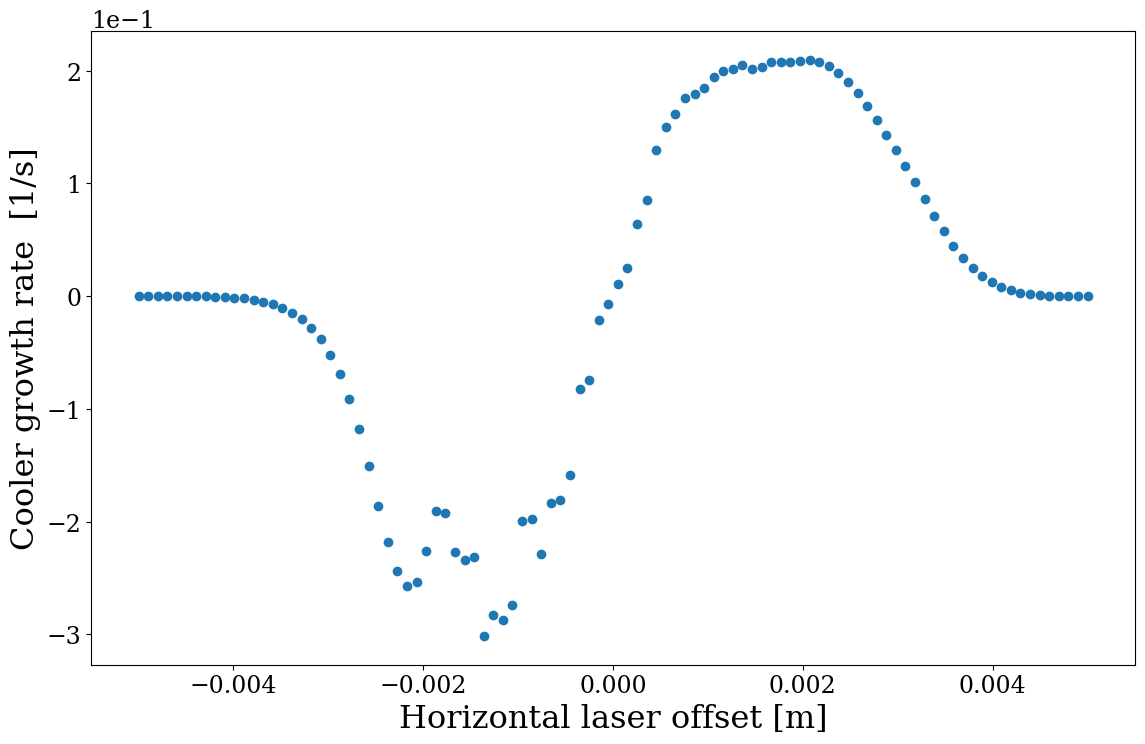

In [209]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in [calcium]:# Ion properties:       
    data = np.load(f'results/Optimal_laser_x_{ion.name}.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    cooler_growth_rates_list = data['cooler_growth_rates_list']
    final_emittance_list = data['final_emittance_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    
    
    plt.scatter(laser_x_list,cooler_growth_rates_list)
plt.xlabel('Horizontal laser offset [m]')
plt.ylabel('Cooler growth rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

In [210]:
loaded_data = np.load('results/Xe$^{39+}$.npz')

delta    = loaded_data['delta']
zeta    = loaded_data['zeta']
state = loaded_data['state']
x = loaded_data['x']
time=loaded_data['time']
s_per_turn=loaded_data['s_per_turn']
px=loaded_data['px']
action_x=loaded_data['action_x']
action_y=loaded_data['action_y']
emittance_x=loaded_data['emittance_x']

excited=state==2
delta_std = np.std(delta, axis=1)

exc0=excited[1,:]

fraction_excited=sum(exc0)/len(exc0)*100

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))


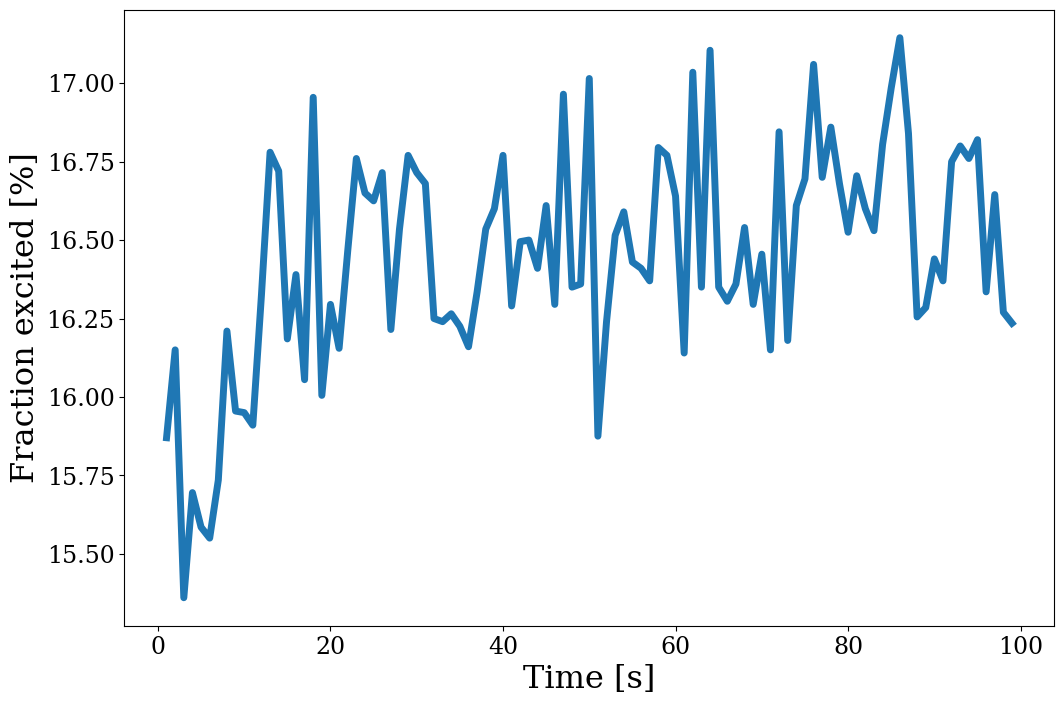

In [211]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time[1:],fraction_excited[1:], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
plt.show()

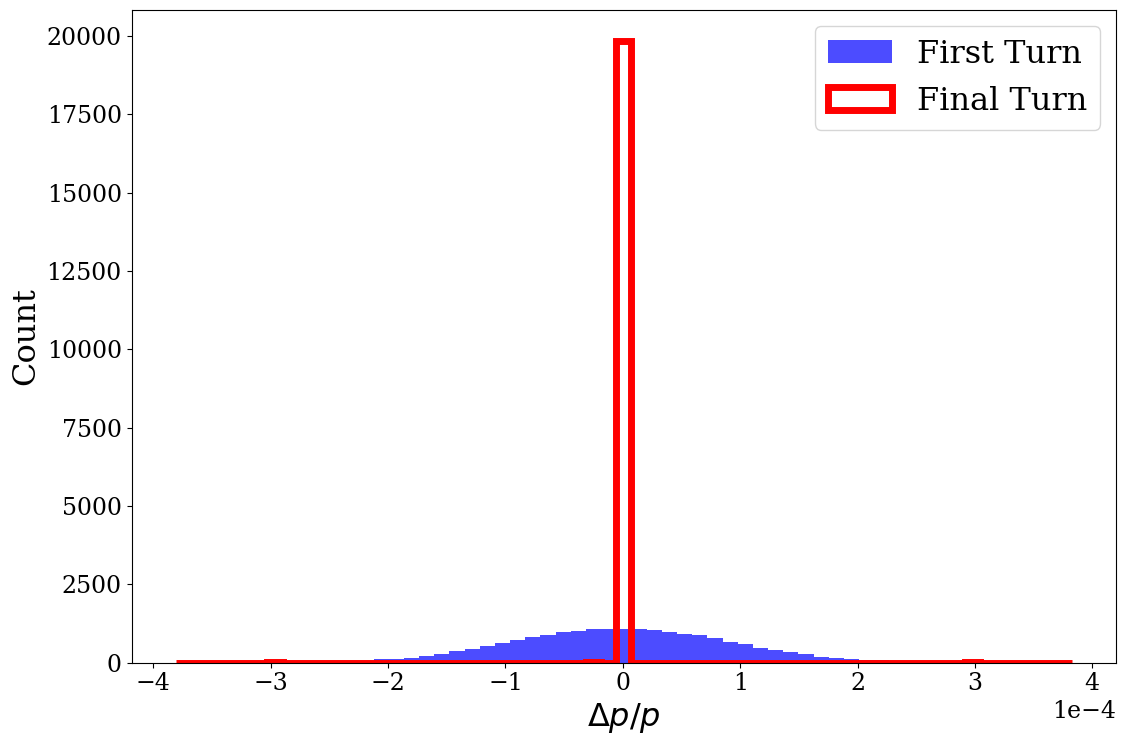

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot histograms for delta at the first and final turns
min_delta=min(delta_final_turn)
max_delta=max(delta_final_turn)
bins=np.linspace(min_delta, max_delta,60)
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


PX

In [213]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Extract delta at the first turn (assuming the first turn is at index 0)
# px_first_turn = px[0, :]

# # Extract px at the final turn
# px_final_turn = px[-1, :]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# # Plot histograms for px at the first and final turns
# min_px=min(px_final_turn)
# max_px=max(px_final_turn)
# bins=np.linspace(min_delta, max_px,60)
# # plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# # plt.hist(px_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
# plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
# plt.hist(px_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
# plt.xlabel('px')
# plt.ylabel('Count')
# plt.legend()
# plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# #plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
# plt.show()


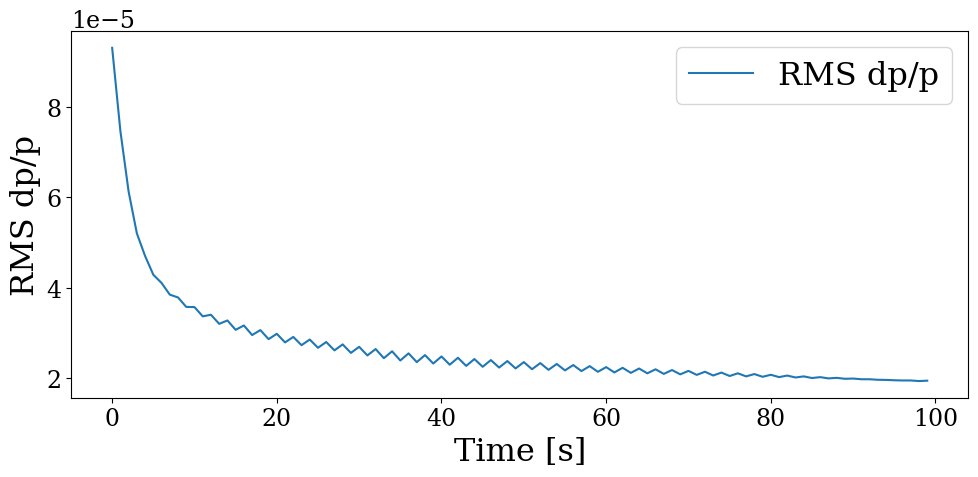

In [214]:
sigma_dp = np.std(delta[0, :])
# plot some overall values
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, np.std(delta, axis=1), label=f'RMS dp/p')
# plt.plot(time, np.mean(action_x, axis=1), label=f'RMS $\epsilon_x$')
# plt.plot(time, np.mean(action_y, axis=1), label=f'RMS $\epsilon_y$')
plt.xlabel('Time [s]')
plt.ylabel('RMS dp/p')
plt.legend()
plt.tight_layout()
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

phase space

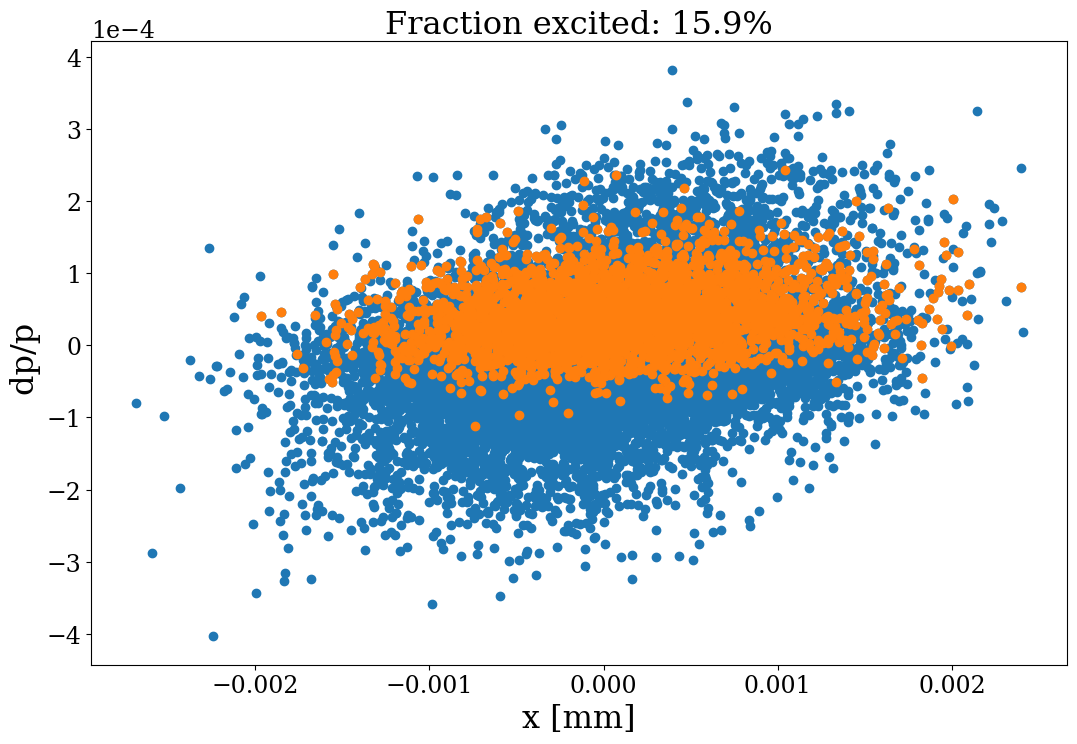

In [215]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

with histogram

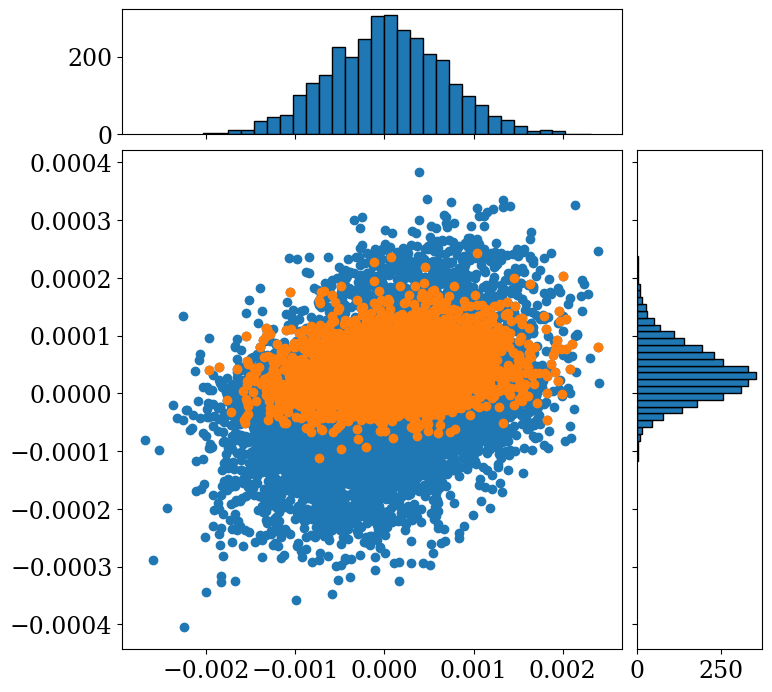

In [216]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate histograms for excited particles
x_excited_hist, x_excited_bins = np.histogram(x[turn][excited0], bins=30)
delta_excited_hist, delta_excited_bins = np.histogram(delta[turn][excited0], bins=30)

# Start with a square Figure.
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the main Axes.
ax_main = fig.add_subplot(gs[1, 0])

# Create the histogram along x-axis for excited particles.
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_main)

# Create the histogram along y-axis for excited particles.
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_main)

# Plot the scatter plot on the main Axes.
ax_main.scatter(x[turn], delta[turn])
ax_main.scatter(x[turn][excited0], delta[turn][excited0])

# Plot the histogram along x-axis for excited particles.
ax_histx.bar(x_excited_bins[:-1], x_excited_hist, width=np.diff(x_excited_bins), edgecolor='black')

# Plot the histogram along y-axis for excited particles.
ax_histy.barh(delta_excited_bins[:-1], delta_excited_hist, height=np.diff(delta_excited_bins), edgecolor='black')

# Remove inner labels for histogram plots
ax_histx.tick_params(axis='x', which='both', labelbottom=False)
ax_histy.tick_params(axis='y', which='both', labelleft=False)

plt.show()


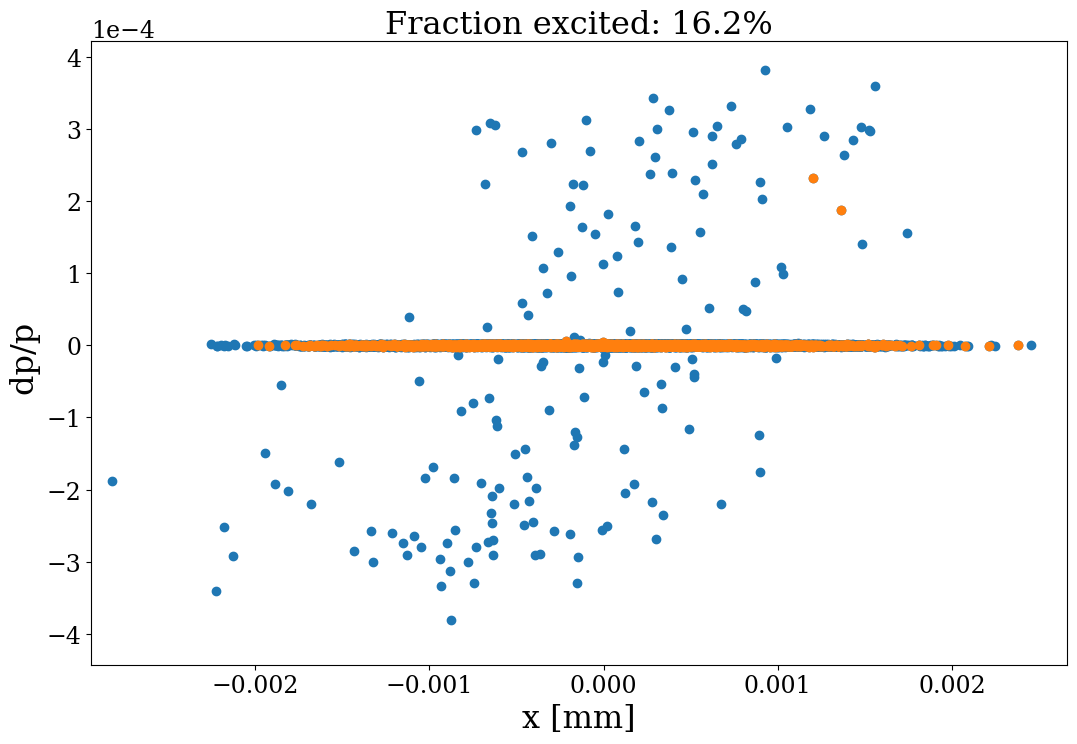

In [217]:
turn=-1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

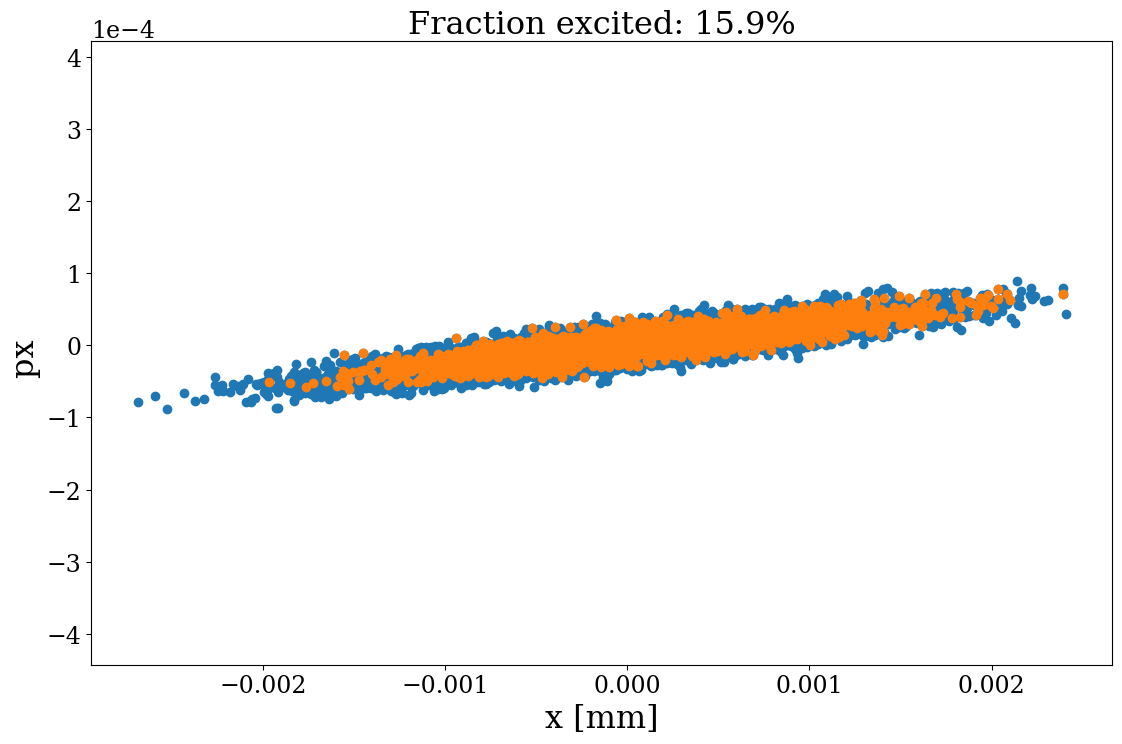

In [218]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],px[turn])
plt.scatter(x[turn][excited0],px[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('px ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

Zeta

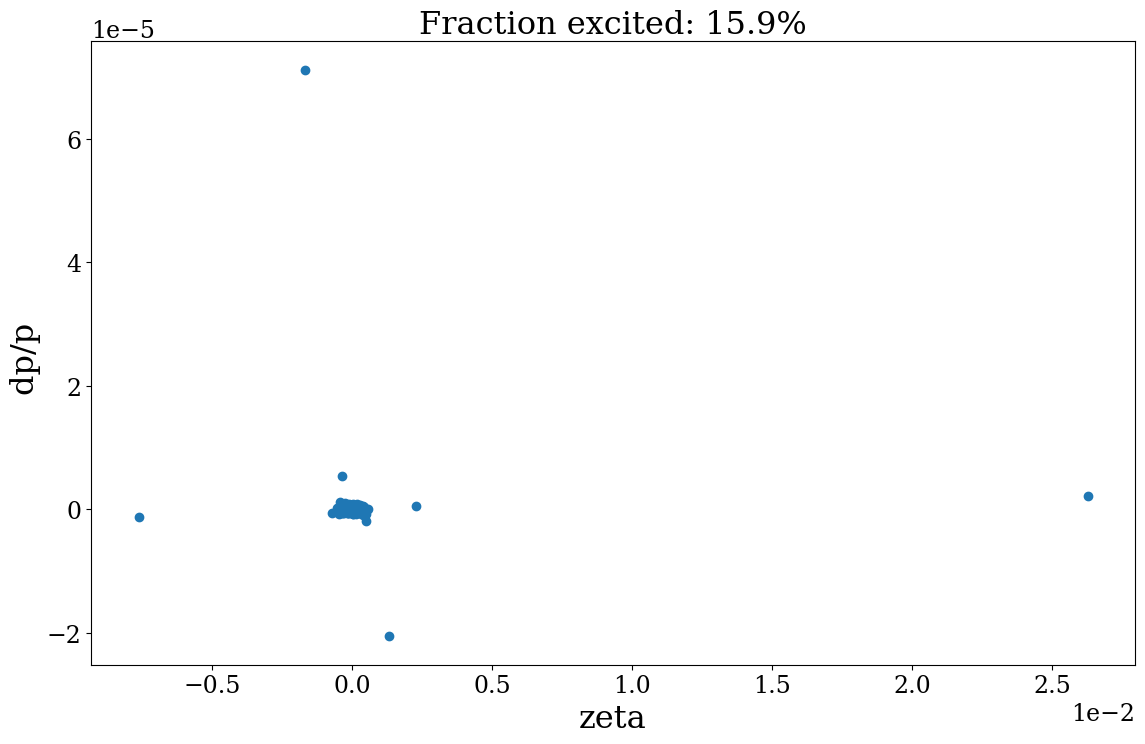

In [219]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

plt.scatter(zeta[:,0],delta[:,0]) #turns,particles
plt.xlabel('zeta')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

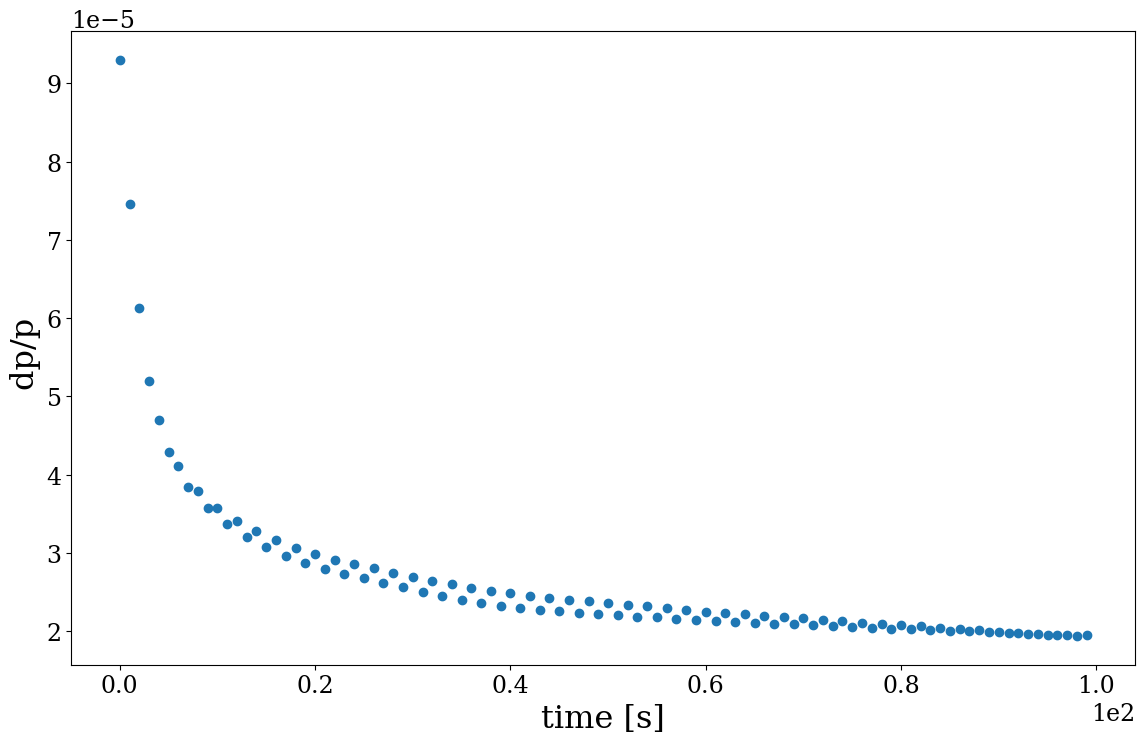

In [220]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(time,np.std(delta,axis=1)) #turns,particles
plt.xlabel('time [s]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()